<a href="https://colab.research.google.com/github/Ozelveysell/makine_ogrenmesi/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

diabetes.csv veri setimi Colab'a upload ettim.

---



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


Veri setini okudum verileri sağlıklı ve hasta olarak birbirinden ayırıp histogram grafiklerini çizdirdim.

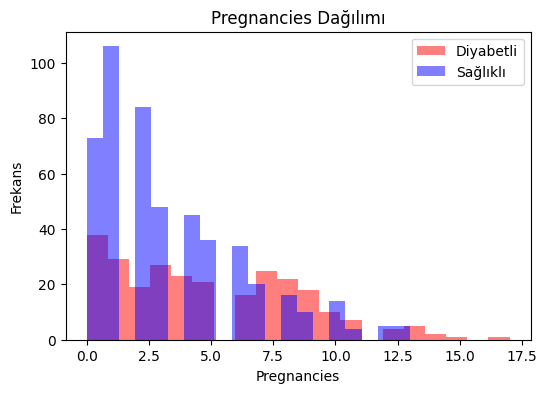

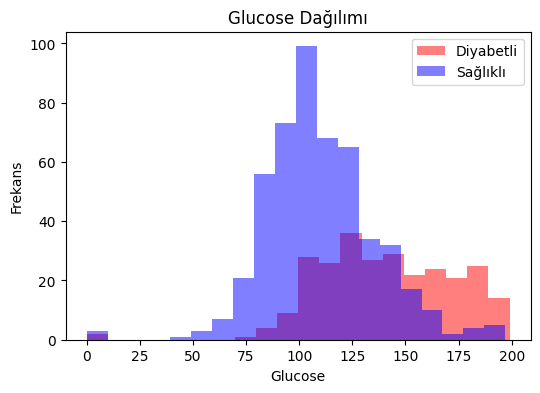

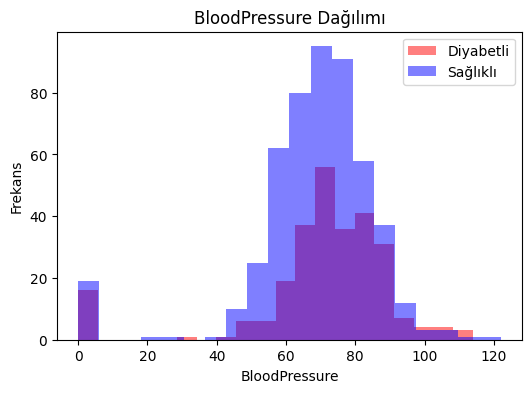

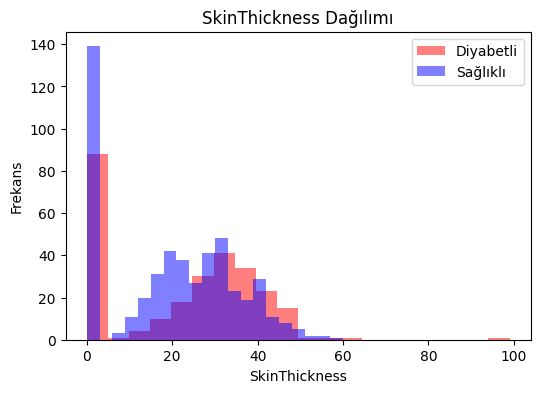

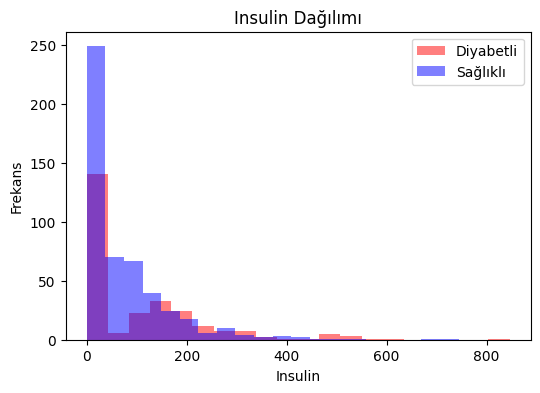

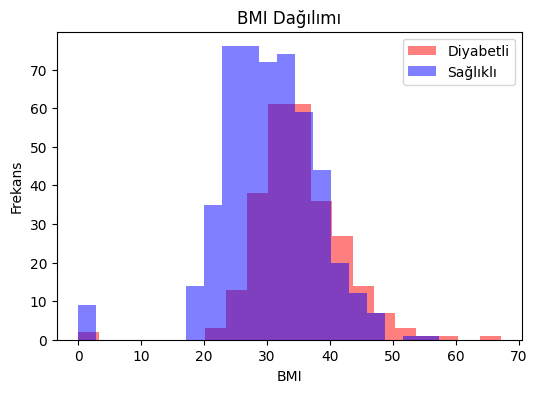

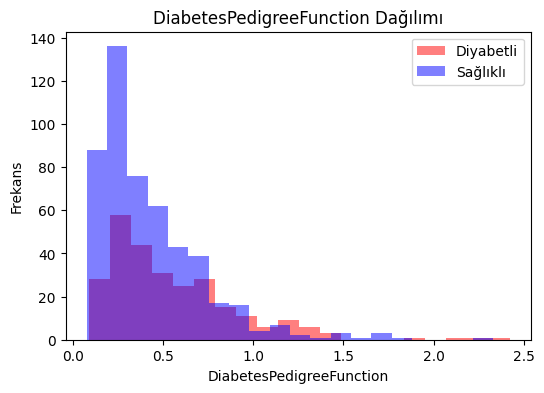

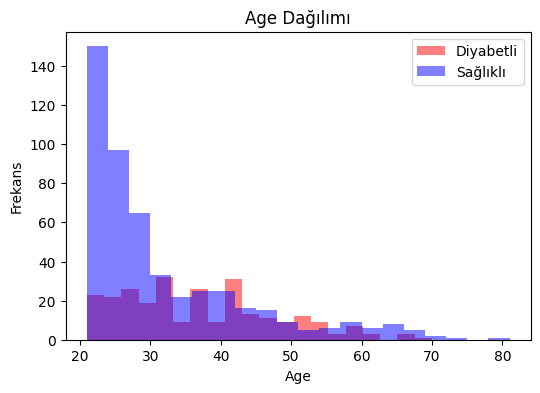

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Diyabet hastalarını ve sağlıklı kişileri ayırma
diabetes = data[data['Outcome'] == 1]
healthy = data[data['Outcome'] == 0]

# Histogramları çizme
for column in data.columns[:-1]:  # Sınıf sütununu dışarıda bırak
    plt.figure(figsize=(6, 4))  # Boyutu küçültme
    plt.hist(diabetes[column], bins=20, alpha=0.5, color='red', label='Diyabetli')
    plt.hist(healthy[column], bins=20, alpha=0.5, color='blue', label='Sağlıklı')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.title(f'{column} Dağılımı')
    plt.legend()
    plt.show()


Veri setime Min-Max normalizasyonu uygulayıp

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Veri setini inceleme
print("Veri seti başlıkları:")
print(data.head())

# Normalizasyon yöntemini seçme (Min-Max normalizasyonu)
scaler = MinMaxScaler()

# Normalizasyonu uygulama
normalized_data = scaler.fit_transform(data)

# Normalleştirilmiş veri setini DataFrame'e dönüştürme
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

# Normalleştirilmiş veri setini inceleme
print("\nNormalleştirilmiş veri seti başlıkları:")
print(normalized_df.head())


Veri seti başlıkları:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Normalleştirilmiş veri seti başlıkları:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     

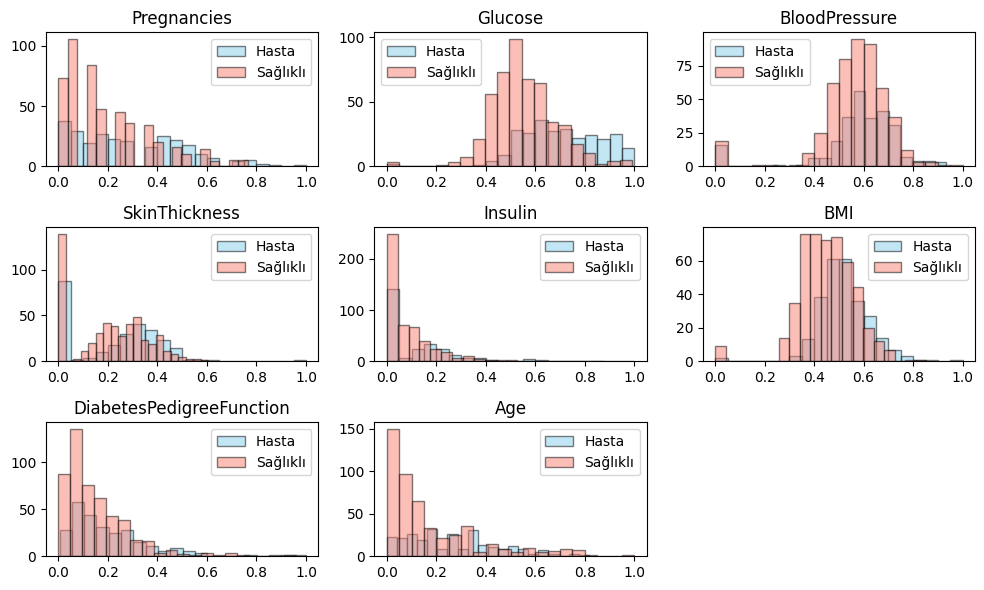

In [ ]:
import matplotlib.pyplot as plt

# Hasta kişilerin verisi
hasta_veri = normalized_df[normalized_df['Outcome'] == 1]

# Sağlıklı kişilerin verisi
saglikli_veri = normalized_df[normalized_df['Outcome'] == 0]

# Histogramları çizme
plt.figure(figsize=(10, 6))

for i, column in enumerate(normalized_df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    plt.hist(hasta_veri[column], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Hasta')
    plt.hist(saglikli_veri[column], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Sağlıklı')
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Özellikler ve etiketleri ayırma
X = data.drop(columns=['Outcome'])  # Etiketi hariç özellikler
y = data['Outcome']  # Etiketler

# Normalizasyon yöntemini seçme (Min-Max normalizasyonu)
scaler = MinMaxScaler()

# Normalizasyonu uygulama
normalized_data = scaler.fit_transform(X)

# Normalleştirilmiş veri setini DataFrame'e dönüştürme
normalized_df = pd.DataFrame(normalized_data, columns=X.columns)


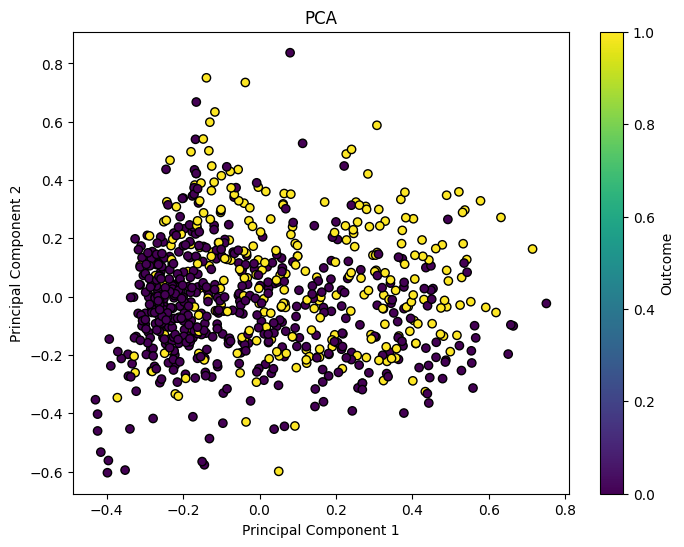

In [ ]:
# PCA modelini oluşturma
pca = PCA(n_components=2)

# PCA'yi uygulama
X_pca = pca.fit_transform(normalized_df)


# Boyut indirgeme sonrası DataFrame oluşturma
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Sonuçları görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Outcome')
plt.show()


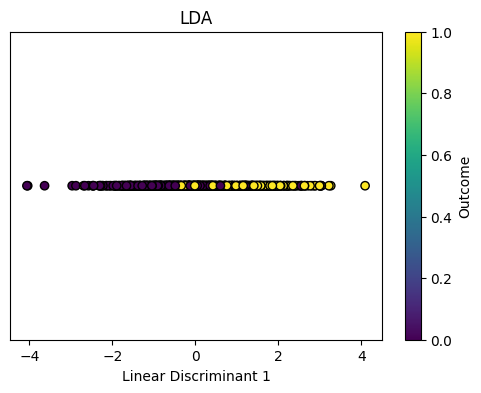

In [ ]:
# LDA modelini oluşturma
lda = LinearDiscriminantAnalysis(n_components=1)

# LDA'yı uygulama
X_lda = lda.fit_transform(normalized_df, y)

# Boyut indirgeme sonrası DataFrame oluşturma
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])

# Sonuçları görselleştirme
plt.figure(figsize=(6, 4))
plt.scatter(lda_df['LD1'], [0] * len(lda_df), c=y, cmap='viridis', edgecolor='k')
plt.yticks([])
plt.xlabel('Linear Discriminant 1')
plt.title('LDA')
plt.colorbar(label='Outcome')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# PCA modelini oluşturma
pca = PCA(n_components=2)

# PCA'yi uygulama
X_pca = pca.fit_transform(normalized_df)

# LDA modelini oluşturma
lda = LinearDiscriminantAnalysis(n_components=1)

# LDA'yı uygulama
X_lda = lda.fit_transform(normalized_df, y)


In [ ]:
# PCA için en ayırt edici özellikler
pca_weights = pca.components_
pca_feature_weights = pd.DataFrame(pca_weights, columns=normalized_df.columns, index=['PC1', 'PC2'])
print("PCA için en ayırt edici özellikler:")
print(pca_feature_weights)

# LDA için en ayırt edici özellikler
lda_weights = lda.coef_
lda_feature_weights = pd.DataFrame(lda_weights, columns=normalized_df.columns, index=['LD1'])
print("\nLDA için en ayırt edici özellikler:")
print(lda_feature_weights)


PCA için en ayırt edici özellikler:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
PC1     0.652044  0.241361       0.225165      -0.055924 -0.003863  0.052026   
PC2    -0.169324  0.356766       0.331040       0.598155  0.447368  0.319425   

     DiabetesPedigreeFunction       Age  
PC1                  0.019150  0.677988  
PC2                  0.267494 -0.054283  

LDA için en ayırt edici özellikler:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
LD1     2.205743  7.423436      -1.792569       0.096389 -0.962367  5.599547   

     DiabetesPedigreeFunction       Age  
LD1                  2.172778  0.991046  


Raporladığınız sonuçlar, PCA ve LDA için her bir özniteliğin ağırlıklarını göstermektedir. Bu ağırlıklar, her bir yöntemdeki bileşenlerin veya lineer diskriminantın (LD1) özellikler üzerindeki etkilerini gösterir. Ağırlıkların mutlak değerleri, özelliğin ne kadar önemli olduğunu belirtir.

PCA için en ayırt edici özellikler:

PC1 bileşeni için en yüksek ağırlıklı öznitelikler: Age ve Pregnancies öznitelikleri belirgin bir şekilde ağırlıklıdır.
PC2 bileşeni için en yüksek ağırlıklı öznitelikler: SkinThickness ve Insulin öznitelikleri.


LDA için en ayırt edici özellikler:

LD1 için en yüksek ağırlıklı öznitelikler: Glucose ve BMI öznitelikleri LD1 için belirgin bir şekilde ağırlıklıdır.

Sonuç olarak, PCA ve LDA sonuçlarına göre, en ayırt edici öznitelikler değişiklik göstermektedir. Ancak, her iki durumda da öne çıkan özelliklerin belirli bir trendi olduğu gözlemlenmektedir. Özellikle, Glucose, BMI ve Insulin gibi özelliklerin, diyabet hastalığı ile ilişkili olduğu ve sınıflandırma modellerinde önemli rol oynayabileceği görülmektedir.








In [ ]:
# Ana veri seti
print(normalized_df)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [ ]:
# PCA uygulanmış transformasyon öznitelik matrisi
print(X_pca)

[[ 0.30495538  0.09038229]
 [-0.19329811 -0.07295217]
 [ 0.21810848 -0.12757474]
 ...
 [ 0.00526229 -0.02210395]
 [ 0.04523188 -0.18898757]
 [-0.2650889  -0.01445655]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ana veri setine Min-Max normalizasyonu uygulama
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

# PCA uygulanmış transformasyon öznitelik matrisine Min-Max normalizasyonu uygulama
pca_transformed_data = scaler.fit_transform(X_pca)
pca_transformed_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])

# Sonuçları görselleştirme
print("Ana veri setine uygulanan Min-Max normalizasyonu:")
print(normalized_df.head())

print("\nPCA uygulanmış transformasyon öznitelik matrisine uygulanan Min-Max normalizasyonu:")
print(pca_transformed_df.head())


Ana veri setine uygulanan Min-Max normalizasyonu:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  

PCA uygulanmış transformasyon öznitelik matrisine uygulanan Min-Max normalizasyonu:
        PC1       PC2
0  0.622371  0.481938
1  0.200113  0.368553
2  0.548771  0.330635
3  0.110680  0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Veriyi eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modelini eğitme
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Multinominal Lojistik Regresyon modelini eğitme
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon modelinin katsayıları:")
print(linear_reg_model.coef_)
print("\nMultinominal Lojistik Regresyon modelinin katsayıları:")
print(logistic_reg_model.coef_)

# Test kümesi için performans metriklerini hesaplama ve raporlama
linear_reg_predictions = linear_reg_model.predict(X_test)
logistic_reg_predictions = logistic_reg_model.predict(X_test)

linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("\nÇoklu Doğrusal Regresyon modelinin Test kümesi performansı:")
print("R-kare Değeri:", linear_reg_r2)
print("Ortalama Kare Hatası (MSE):", linear_reg_mse)

logistic_reg_r2 = r2_score(y_test, logistic_reg_predictions)
logistic_reg_mse = mean_squared_error(y_test, logistic_reg_predictions)
print("\nMultinominal Lojistik Regresyon modelinin Test kümesi performansı:")
print("R-kare Değeri:", logistic_reg_r2)
print("Ortalama Kare Hatası (MSE):", logistic_reg_mse)


Çoklu Doğrusal Regresyon modelinin katsayıları:
[ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]

Multinominal Lojistik Regresyon modelinin katsayıları:
[[ 0.0289417   0.01794409 -0.00542954 -0.00073251 -0.00049384  0.05452949
   0.19817304  0.0179893 ]]

Çoklu Doğrusal Regresyon modelinin Test kümesi performansı:
R-kare Değeri: 0.2224076496611056
Ortalama Kare Hatası (MSE): 0.17603335005142037

Multinominal Lojistik Regresyon modelinin Test kümesi performansı:
R-kare Değeri: -0.16647350993377508
Ortalama Kare Hatası (MSE): 0.26406926406926406


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Veri setini eğitim ve test alt kümelerine ayırma (%70 eğitim, %30 test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modelini oluşturma ve eğitme
model_linear = LinearRegression()
model_linear.fit(X_train_pca, y_train_pca)

# Modeli test veri seti üzerinde değerlendirme
score_linear = model_linear.score(X_test_pca, y_test_pca)
print("Çoklu Doğrusal Regresyon için Model R^2 skoru:", score_linear)

# Multinominal Lojistik Regresyon modelini oluşturma ve eğitme
model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X_train_pca, y_train_pca)

# Modeli test veri seti üzerinde değerlendirme
score_logistic = model_logistic.score(X_test_pca, y_test_pca)
print("Multinominal Lojistik Regresyon için Model skoru:", score_logistic)


Çoklu Doğrusal Regresyon için Model R^2 skoru: 0.10529612565452506
Multinominal Lojistik Regresyon için Model skoru: 0.7142857142857143


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Özellikler ve hedef değişkeni seçme
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Veri setini eğitim ve test setlerine ayırma (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modelini oluşturma ve eğitme
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = decision_tree.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sonuçları yazdırma
print("Karar Ağacı Sınıflandırma Modelinin Performansı:")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)


Karar Ağacı Sınıflandırma Modelinin Performansı:
Accuracy Score: 0.7012987012987013
Precision Score: 0.5555555555555556
Recall Score: 0.6875
F1 Score: 0.6145251396648045

Confusion Matrix:
 [[107  44]
 [ 25  55]]


Accuracy (Doğruluk): Modelin doğru sınıflandırma oranı %70.13'tür. Ancak, sınıflandırma problemi dengesizse (yani sınıflar arasında eşit olmayan dağılım varsa), doğruluk ölçütü tek başına güvenilir bir performans metriği olmayabilir.

Precision (Kesinlik): Pozitif olarak tahmin edilen sonuçların ne kadarının gerçekten pozitif olduğunu ölçer. Kesinlik oranı %55.56'dır. Yani, modelin pozitif olarak tahmin ettiği vakaların %55.56'sı gerçekten pozitiftir.

Recall (Duyarlılık): Gerçekten pozitif olan tüm vakaların ne kadarının doğru bir şekilde tahmin edildiğini ölçer. Duyarlılık oranı %68.75'tir. Model, gerçekten pozitif olan vakaların %68.75'ini doğru bir şekilde tahmin edebilmiştir.

F1 Score: Kesinlik ve duyarlılık arasındaki dengeyi ölçer. F1 skoru, %61.45'tir.

Confusion Matrix (Karışıklık Matrisi): Modelin tahminlerini ve gerçek sınıfları gösterir. Pozitif ve negatif sınıflandırmalar için doğru ve yanlış tahminlerin sayılarını gösterir. Karışıklık matrisine bakarak modelin performansını daha ayrıntılı olarak gözlemleyebiliriz.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veri setini eğitim ve test alt kümelerine ayırma (%70 eğitim, %30 test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırma modelini oluşturma ve eğitme
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_pca, y_train_pca)

# Ağaç yapısını yazdırma
print("Karar Ağacı Yapısı:")
print(tree_classifier.tree_)

# Test verisi üzerinde modelin performansını değerlendirme
y_pred_tree = tree_classifier.predict(X_test_pca)
print("Confusion Matrix:")
print(confusion_matrix(y_test_pca, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test_pca, y_pred_tree))


Karar Ağacı Yapısı:
Confusion Matrix:
[[105  46]
 [ 37  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       151
           1       0.48      0.54      0.51        80

    accuracy                           0.64       231
   macro avg       0.61      0.62      0.61       231
weighted avg       0.65      0.64      0.64       231



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Özellikler ve hedef değişkeni seçme
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Veri setini eğitim ve test setlerine ayırma (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcı modelini oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = naive_bayes.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Sonuçları yazdırma
print("Naive Bayes Sınıflandırıcı Modelinin Performansı:")
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)


Naive Bayes Sınıflandırıcı Modelinin Performansı:
Accuracy Score: 0.7445887445887446
Precision Score: 0.6235294117647059
Recall Score: 0.6625
F1 Score: 0.6424242424242423

Confusion Matrix:
 [[119  32]
 [ 27  53]]


Accuracy (Doğruluk): Modelin doğru sınıflandırma oranı %74.46'dır. Yani, tüm test örneklerinin yaklaşık %74.46'sı doğru bir şekilde sınıflandırılmıştır.

Precision (Kesinlik): Pozitif olarak tahmin edilen sonuçların ne kadarının gerçekten pozitif olduğunu ölçer. Kesinlik oranı %62.35'tir. Yani, modelin pozitif olarak tahmin ettiği vakaların %62.35'i gerçekten pozitiftir.

Recall (Duyarlılık): Gerçekten pozitif olan tüm vakaların ne kadarının doğru bir şekilde tahmin edildiğini ölçer. Duyarlılık oranı %66.25'tir. Model, gerçekten pozitif olan vakaların %66.25'ini doğru bir şekilde tahmin edebilmiştir.

F1 Score: Kesinlik ve duyarlılık arasındaki dengeyi ölçer. F1 skoru, %64.24'tür.

Confusion Matrix (Karışıklık Matrisi): Modelin tahminlerini ve gerçek sınıfları gösterir. Pozitif ve negatif sınıflandırmalar için doğru ve yanlış tahminlerin sayılarını gösterir. Karışıklık matrisine bakarak modelin performansını daha ayrıntılı olarak gözlemleyebiliriz.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Veri setini eğitim ve test alt kümelerine ayırma (%70 eğitim, %30 test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train_pca)

# Eğitim veri seti üzerinde modelin performansını değerlendirme
y_pred_train = nb_classifier.predict(X_train_pca)
print("Eğitim veri seti için Naive Bayes sınıflandırıcısı performansı:")
print(classification_report(y_train_pca, y_pred_train))


Eğitim veri seti için Naive Bayes sınıflandırıcısı performansı:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       349
           1       0.64      0.45      0.53       188

    accuracy                           0.72       537
   macro avg       0.69      0.66      0.66       537
weighted avg       0.71      0.72      0.70       537



In [ ]:
from sklearn.metrics import classification_report

# Test verisi üzerinde modelin performansını değerlendirme
y_pred_test = nb_classifier.predict(X_test_pca)
print("Test verisi için Naive Bayes sınıflandırıcısı performansı:")
print(classification_report(y_test_pca, y_pred_test))


Test verisi için Naive Bayes sınıflandırıcısı performansı:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       151
           1       0.58      0.46      0.51        80

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231



In [ ]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler ve hedef değişkeni ayırma
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Eğitim ve test veri kümelerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ağaç modelini oluşturma ve eğitme
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Ağaç görselleştirmek için .dot dosyası oluşturma
export_graphviz(clf, out_file="tree.dot",
                feature_names=feature_names,
                class_names=["Diyabet Yok", "Diyabet Var"],
                filled=True, rounded=True)


In [ ]:
import graphviz

# Ağaç görselleştirmek için .dot dosyasını yükleme
with open("tree.dot") as f:
    dot_graph = f.read()

# .dot dosyasını görselleştirmek için graphviz ile render etme ve boyutu küçültme
graph = graphviz.Source(dot_graph, format='png')
graph.render("tree", format='png', cleanup=True, directory='./', view=False, quiet=False)



'tree.png'

In [ ]:
from PIL import Image

# Oluşturulan görüntüyü yükleyin
img = Image.open("tree.png")

# Yeni boyutu belirleyin (örneğin, 500x300)
new_width = 1000
new_height = 600

# Boyutu yeniden ayarlayın
img = img.resize((new_width, new_height))

# Yeni görüntüyü kaydedin
img.save("tree_resized.png")


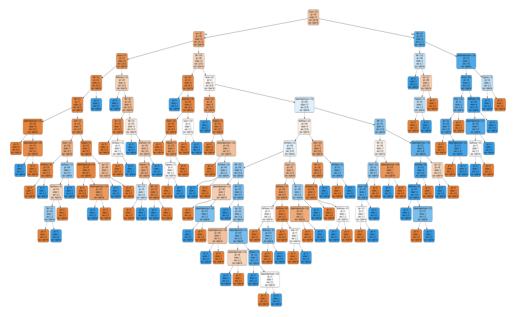

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Yeniden boyutlandırılmış görüntüyü yükleyin
img_resized = Image.open("tree_resized.png")

# Görüntüyü ekrana bastırın
plt.imshow(img_resized)
plt.axis('off')  # Eksenleri kapat
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modelini oluşturma
clf_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=8, min_samples_leaf=4)
clf_pruned.fit(X_train, y_train)

# Budanmış ağacı görselleştirmek için .dot dosyası oluşturma
export_graphviz(clf_pruned, out_file="pruned_tree.dot",
                feature_names=feature_names,
                class_names=["Diyabet Yok", "Diyabet Var"],
                filled=True, rounded=True)


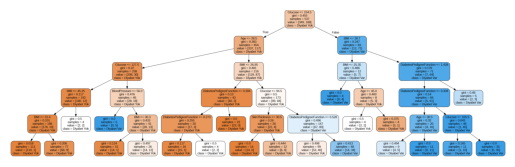

In [ ]:
import graphviz
from PIL import Image
import matplotlib.pyplot as plt

# Budanmış ağacı görselleştirmek için .dot dosyasını yükleme
with open("pruned_tree.dot") as f:
    dot_graph = f.read()

# .dot dosyasını görselleştirmek için graphviz ile render etme ve boyutu küçültme
graph = graphviz.Source(dot_graph, format='png')
graph.render("pruned_tree", format='png', cleanup=True, directory='./', view=False, quiet=False)

# Yeniden boyutlandırılmış görseli yükleme
img_pruned = Image.open("pruned_tree.png")

# Görüntüyü ekrana bastırma
plt.imshow(img_pruned)
plt.axis('off')  # Eksenleri kapatma
plt.show()
